___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df["Gender"] = pd.get_dummies(df["Gender"], drop_first=True)

In [5]:
df.rename(columns={"Gender": "Male", "Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Score"}, errors="raise", inplace = True)

In [6]:
df

,Male,Age,Annual_Income,Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [7]:
df.describe()

,Male,Age,Annual_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


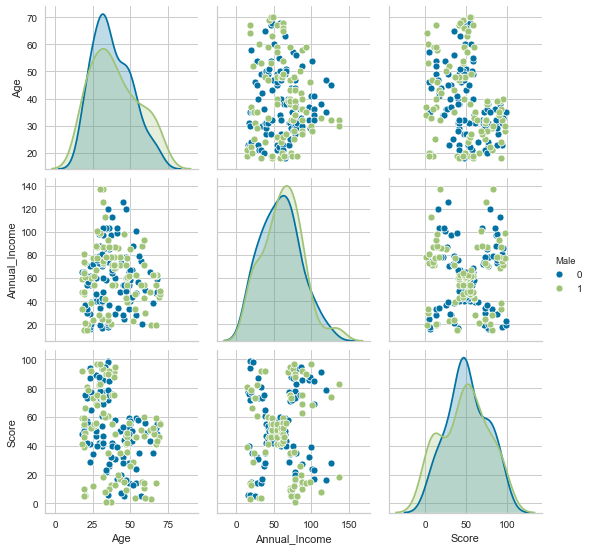

In [8]:
sns.pairplot(data=df, hue="Male")

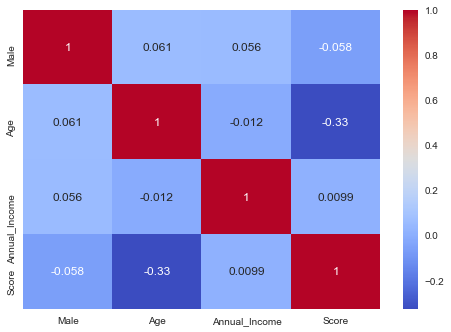

In [10]:
sns.heatmap(df.corr(), annot=True, cmap = "coolwarm")

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [9]:
df1 = df[["Age", "Score"]]

#### *ii. Determine optimal number of clusters*

In [10]:
hopkins(df1, df1.shape[0])

0.2869446305108635

In [11]:
hopkins(scale(df1), df1.shape[0])

0.3163215174607608

In [12]:
df1_s = scale(df1)

In [18]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4692341232501655
Silhouette Score for 3 clusters: 0.45300127016521263
Silhouette Score for 4 clusters: 0.49973941540141753
Silhouette Score for 5 clusters: 0.44526667994351227
Silhouette Score for 6 clusters: 0.44845919861907363
Silhouette Score for 7 clusters: 0.4212938931368575
Silhouette Score for 8 clusters: 0.42721796304676685
Silhouette Score for 9 clusters: 0.4152805569966216


Text(0.5, 1.0, 'Elbow Method')

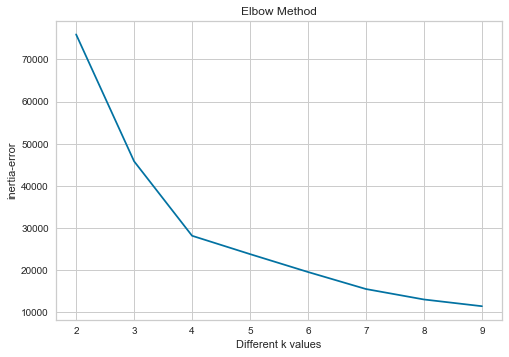

In [19]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

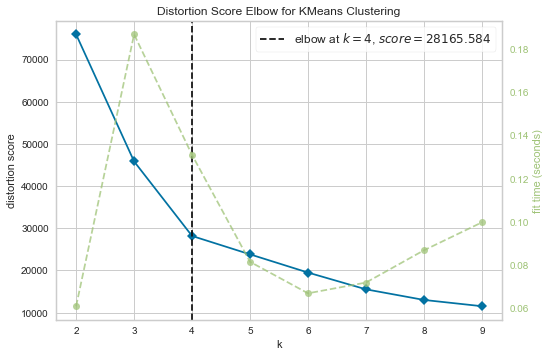

In [21]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df1)
visu.poof()

#### *iii. Apply K Means*

In [22]:
model=KMeans(n_clusters=4)
model.fit(df1)
model

KMeans(n_clusters=4)

**`S(Silhouette) Score`**
* her veri için iki uzaklığı baz alır. Bu uzaklıklardan ilki verinin bulunduğu kümeye ait diğer verilere olan uzaklıkların ortalamasıdır. İkincisi veriye en yakin komsu kümenin tum verilerine olan uzaklıkların ortalamasıdır.
* S değeri ile ifade edilir, s, 1’e yakinsa high clustering, -1e yakinsa low clustering eğilimi gosterir.

In [23]:
print(f'Silhouette Score(n=4): {silhouette_score(df1, model.labels_)}')

Silhouette Score(n=4): 0.49973941540141753


In [24]:
model.inertia_

28165.583566629342

In [25]:
model.labels_

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [26]:
df["pred_by_age"] = model.labels_

In [27]:
df

,Male,Age,Annual_Income,Score,pred_by_age
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,2
3,0,20,16,6,1
4,0,23,16,77,2
5,0,31,17,40,0
...,...,...,...,...,...
196,0,35,120,79,2
197,0,45,126,28,1
198,1,32,126,74,2


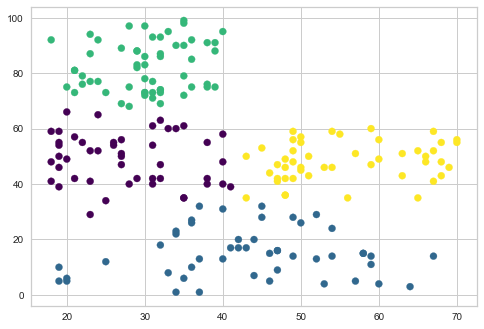

In [28]:
plt.scatter(df["Age"], df["Score"], c=df["pred_by_age"], cmap="viridis")

In [29]:
centers = model.cluster_centers_

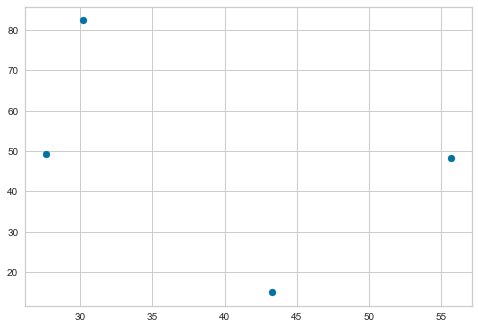

In [30]:
plt.scatter(centers[:,0], centers[:,1], cmap="black")

Text(0, 0.5, 'Score')

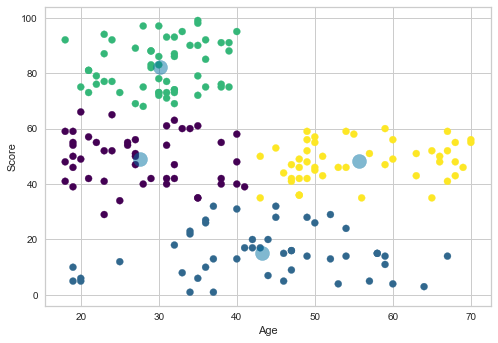

In [32]:
plt.scatter(df["Age"], df["Score"], c=df["pred_by_age"], cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], cmap="black", s=200, alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Score")

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [33]:
df2 = df[["Annual_Income", "Score"]]

#### *ii. Determine optimal number of clusters*

In [34]:
hopkins(df2, df2.shape[0])

0.29636650638595613

In [35]:
hopkins(scale(df2), df2.shape[0])

0.2919514668819929

In [36]:
df2_s = scale(df2)

In [38]:
ssd2 =[]

K = range(2,10)

for k in K:
    model2 = KMeans(n_clusters=k)
    model2.fit(df2)
    ssd2.append(model2.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model2.labels_)}')

Silhouette Score for 2 clusters: 0.2968969162503008
Silhouette Score for 3 clusters: 0.46761358158775435
Silhouette Score for 4 clusters: 0.4931963109249047
Silhouette Score for 5 clusters: 0.553931997444648
Silhouette Score for 6 clusters: 0.53976103063432
Silhouette Score for 7 clusters: 0.5288104473798049
Silhouette Score for 8 clusters: 0.4581763522413715
Silhouette Score for 9 clusters: 0.4565077334305076


Text(0.5, 1.0, 'Elbow Method')

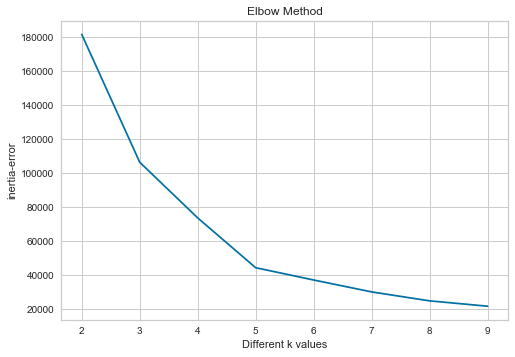

In [39]:
plt.plot(K, ssd2, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

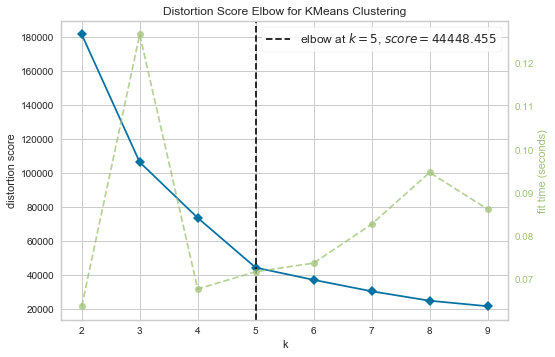

In [40]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.poof()

#### *iii. Apply K Means*

In [41]:
model2=KMeans(n_clusters=5)
model2.fit(df2)
model2

KMeans(n_clusters=5)

In [42]:
print(f'Silhouette Score(n=5): {silhouette_score(df2, model2.labels_)}')

Silhouette Score(n=5): 0.553931997444648


#### *iv. Visualizing and Labeling All the Clusters*

In [43]:
df["pred_by_income"] = model2.labels_

In [45]:
df.sample(20)

,Male,Age,Annual_Income,Score,pred_by_age,pred_by_income
CustomerID,,,,,,
196,0,35,120,79,2,2
71,1,70,49,55,3,1
101,0,23,62,41,0,1
183,1,46,98,15,1,3
144,0,32,76,87,2,2
141,0,57,75,5,1,3
170,1,32,87,63,0,2
14,0,24,20,77,2,4
63,0,67,47,52,3,1


In [49]:
centers = model2.cluster_centers_

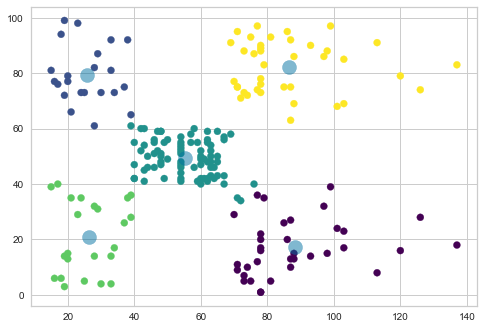

In [50]:
plt.scatter(df["Annual_Income"], df["Score"], c=df["pred_by_income"], cmap="viridis")
plt.scatter(centers[:,0], centers[:,1], cmap="black", s=200, alpha = 0.5)

In [46]:
ct = pd.crosstab(df.pred_by_age, df.pred_by_income)
ct

pred_by_income,0,1,2,3,4
pred_by_age,,,,,
0,4,37,1,2,3
1,17,0,0,31,0
2,0,0,38,0,19
3,2,44,0,2,0


### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

In [61]:
df = df.drop("Male", axis=1)

In [62]:
hc_complete = linkage(df, "complete")
hc_ward = linkage(df, "ward")
hc_single = linkage(df, "single")
hc_average = linkage(df, "average")

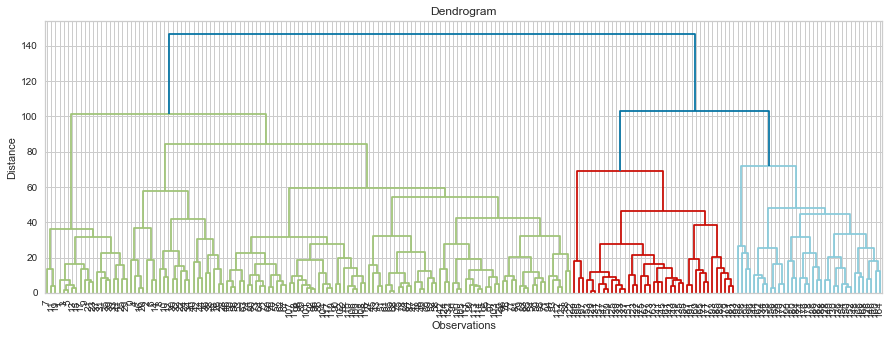

In [63]:
plt.figure(figsize = (15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

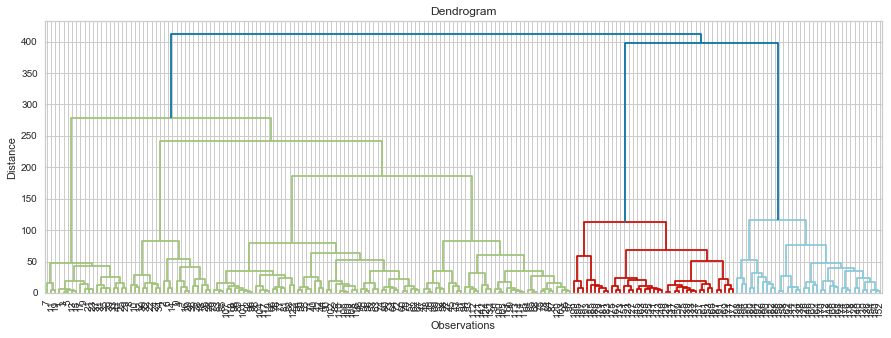

In [64]:
plt.figure(figsize = (15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

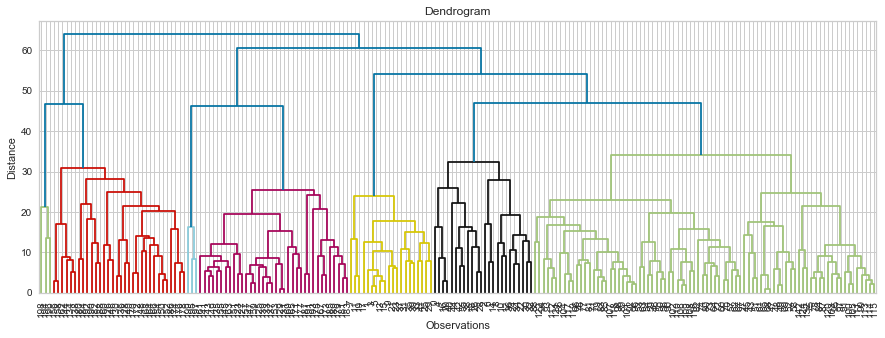

In [65]:
plt.figure(figsize = (15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10);

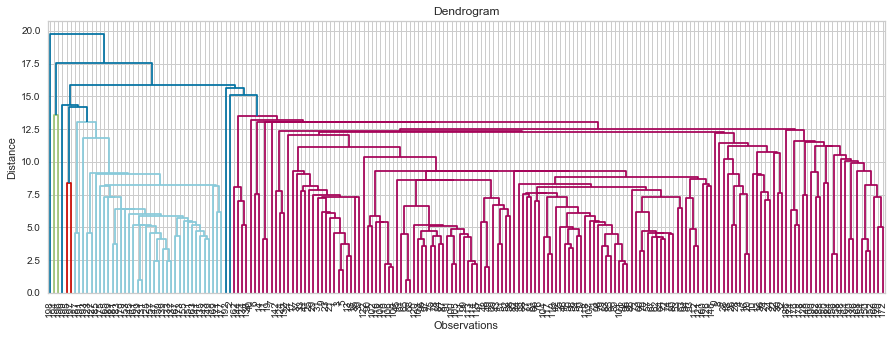

In [66]:
plt.figure(figsize = (15,5))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

#### ii. *Apply Agglomerative Clustering*

In [75]:
cluster = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [76]:
print(cluster.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [78]:
print(f'Silhouette Score(n=5): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=5): 0.44083451314365457


In [85]:
df["pred_by_hierar"] = cluster.labels_

In [86]:
df

,Age,Annual_Income,Score,pred_by_age,pred_by_income,pred_by_hierar
CustomerID,,,,,,
1,19,15,39,0,0,4
2,21,15,81,2,4,3
3,20,16,6,1,0,4
4,23,16,77,2,4,3
5,31,17,40,0,0,4
...,...,...,...,...,...,...
196,35,120,79,2,2,2
197,45,126,28,1,3,1
198,32,126,74,2,2,2


In [87]:
ct = pd.crosstab(df.pred_by_hierar, df.pred_by_income)
ct

pred_by_income,0,1,2,3,4
pred_by_hierar,,,,,
0,3,80,0,1,2
1,0,1,0,34,0
2,0,0,39,0,0
3,0,0,0,0,20
4,20,0,0,0,0


In [98]:
df.groupby("pred_by_hierar").mean()

,Age,Annual_Income,Score,pred_by_age,pred_by_income
pred_by_hierar,,,,,
0,42.569767,54.197674,49.186047,1.581395,1.058140
1,41.685714,88.228571,17.285714,1.142857,2.942857
2,32.692308,86.538462,82.128205,1.948718,2.000000
3,24.850000,24.950000,81.000000,1.900000,4.000000
4,43.900000,24.450000,19.100000,0.800000,0.000000


In [99]:
df.groupby("pred_by_hierar").median()

,Age,Annual_Income,Score,pred_by_age,pred_by_income
pred_by_hierar,,,,,
0,46.5,54.0,49.5,3,1
1,43.0,85.0,16.0,1,3
2,32.0,79.0,83.0,2,2
3,23.0,23.5,78.0,2,4
4,43.5,23.5,14.5,1,0


#### iii. *Visualizing and Labeling All the Clusters* 

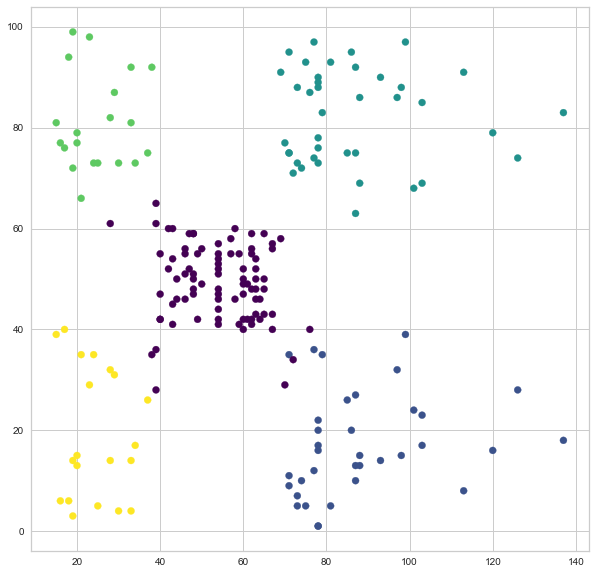

In [95]:
plt.scatter(df["Annual_Income"], df["Score"], c=cluster.labels_, cmap="viridis")

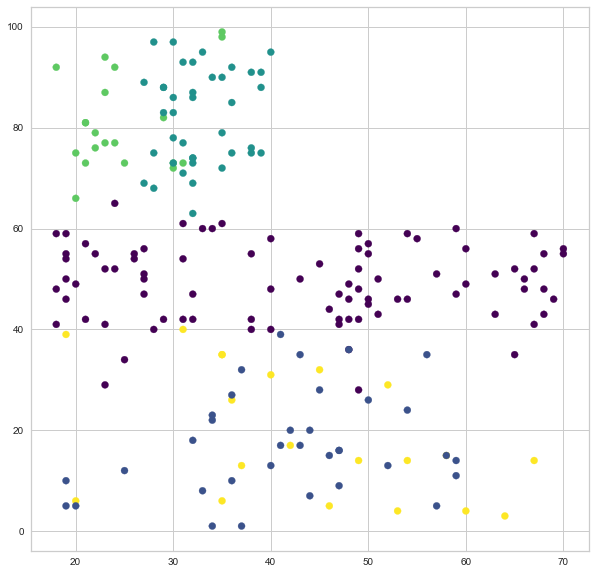

In [96]:
plt.scatter(df["Age"], df["Score"], c=cluster.labels_, cmap="viridis")

In [83]:
from mpl_toolkits.mplot3d import Axes3D

kmeans= KMeans(n_clusters=5).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

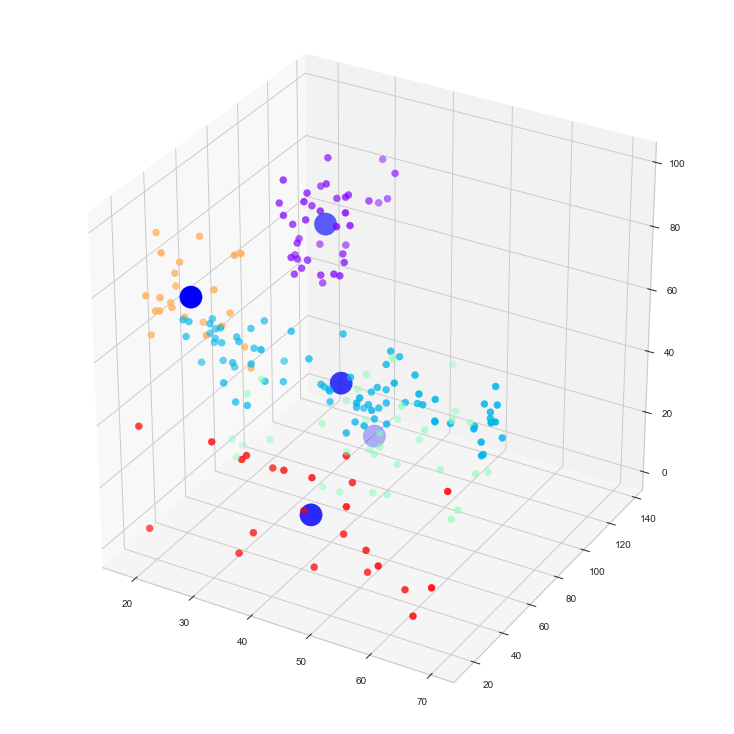

In [84]:
plt.rcParams["figure.figsize"] =(10,10)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "rainbow")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="blue",marker="o",s = 500);

### Conclusion

Mirza Hocanın sonuç cümleleri aşağıdadır. Herkes kendine göre yorumları güncelleyebilir.

In this project we have worked on classifying the customers using the methods K-means, Agglomerative and Hierarchical Clustering.
Our customers can be classified into 3 groups by considering their ages and scores. The older customers, younger with high score and younger with low score.
By considering their annual income and scores, the customers can be segmented 5 groups:
* Customers who have lower than average income:
  * and who have low score
  * and wh have high score
* Customers who have average income
* Customers who have higher than average income:
  * and who have low score
  * and wh have high score

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___